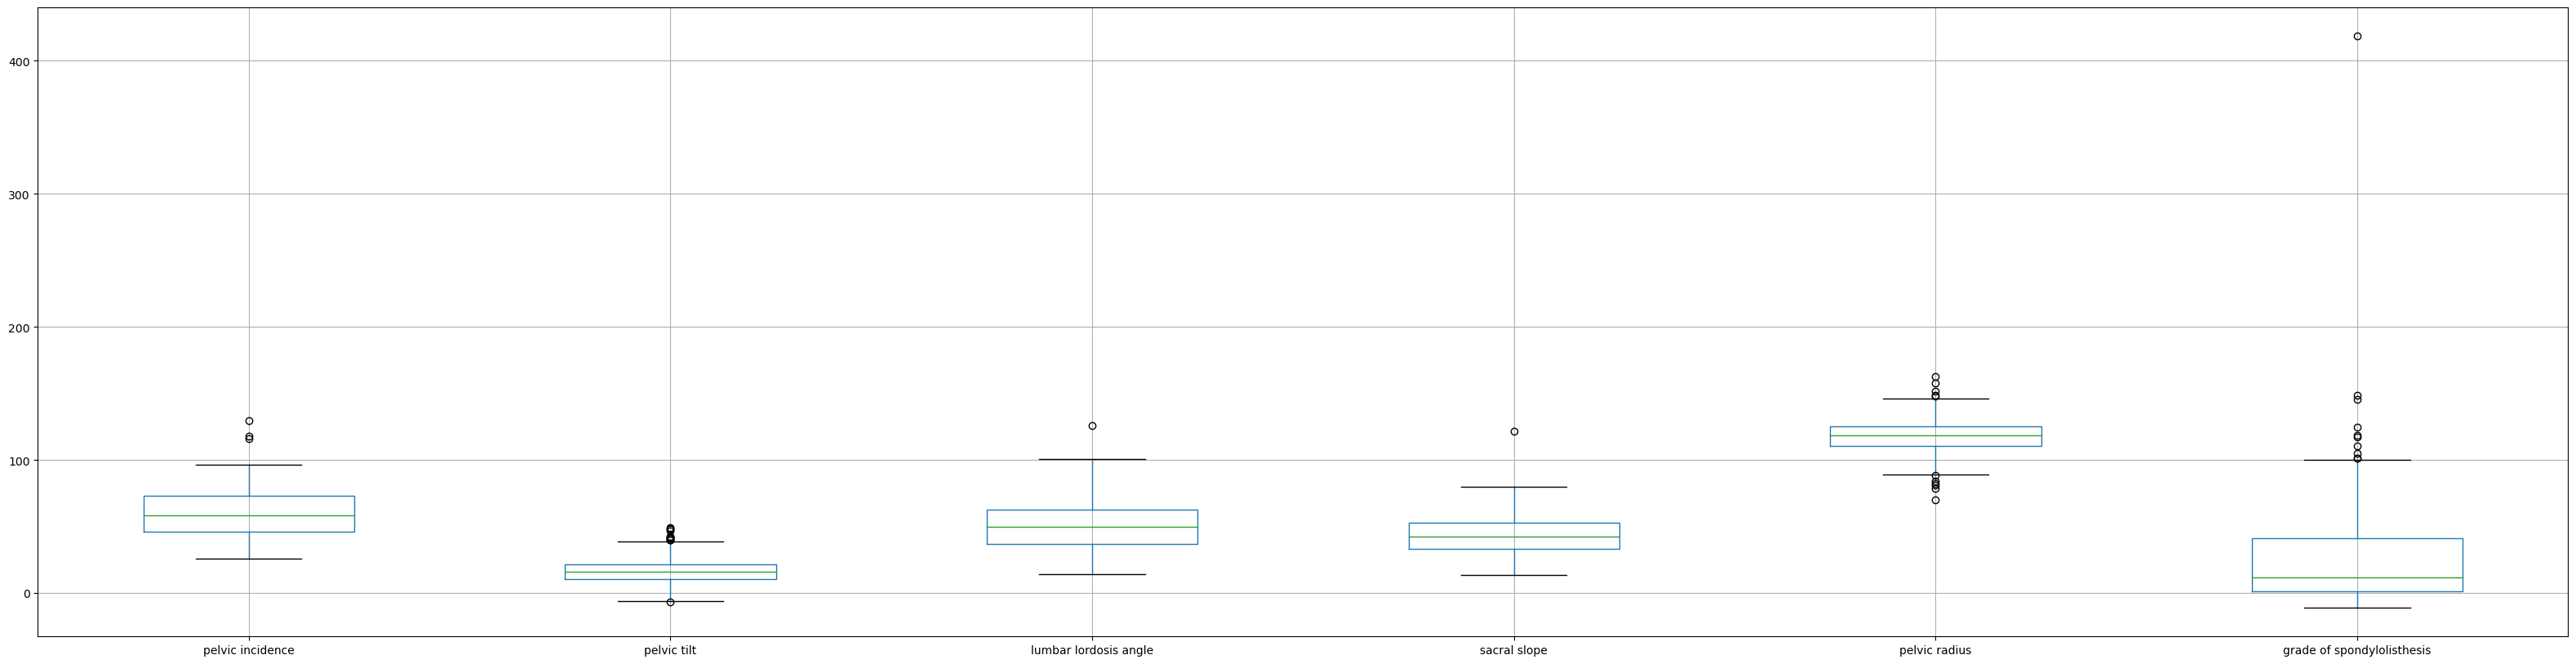

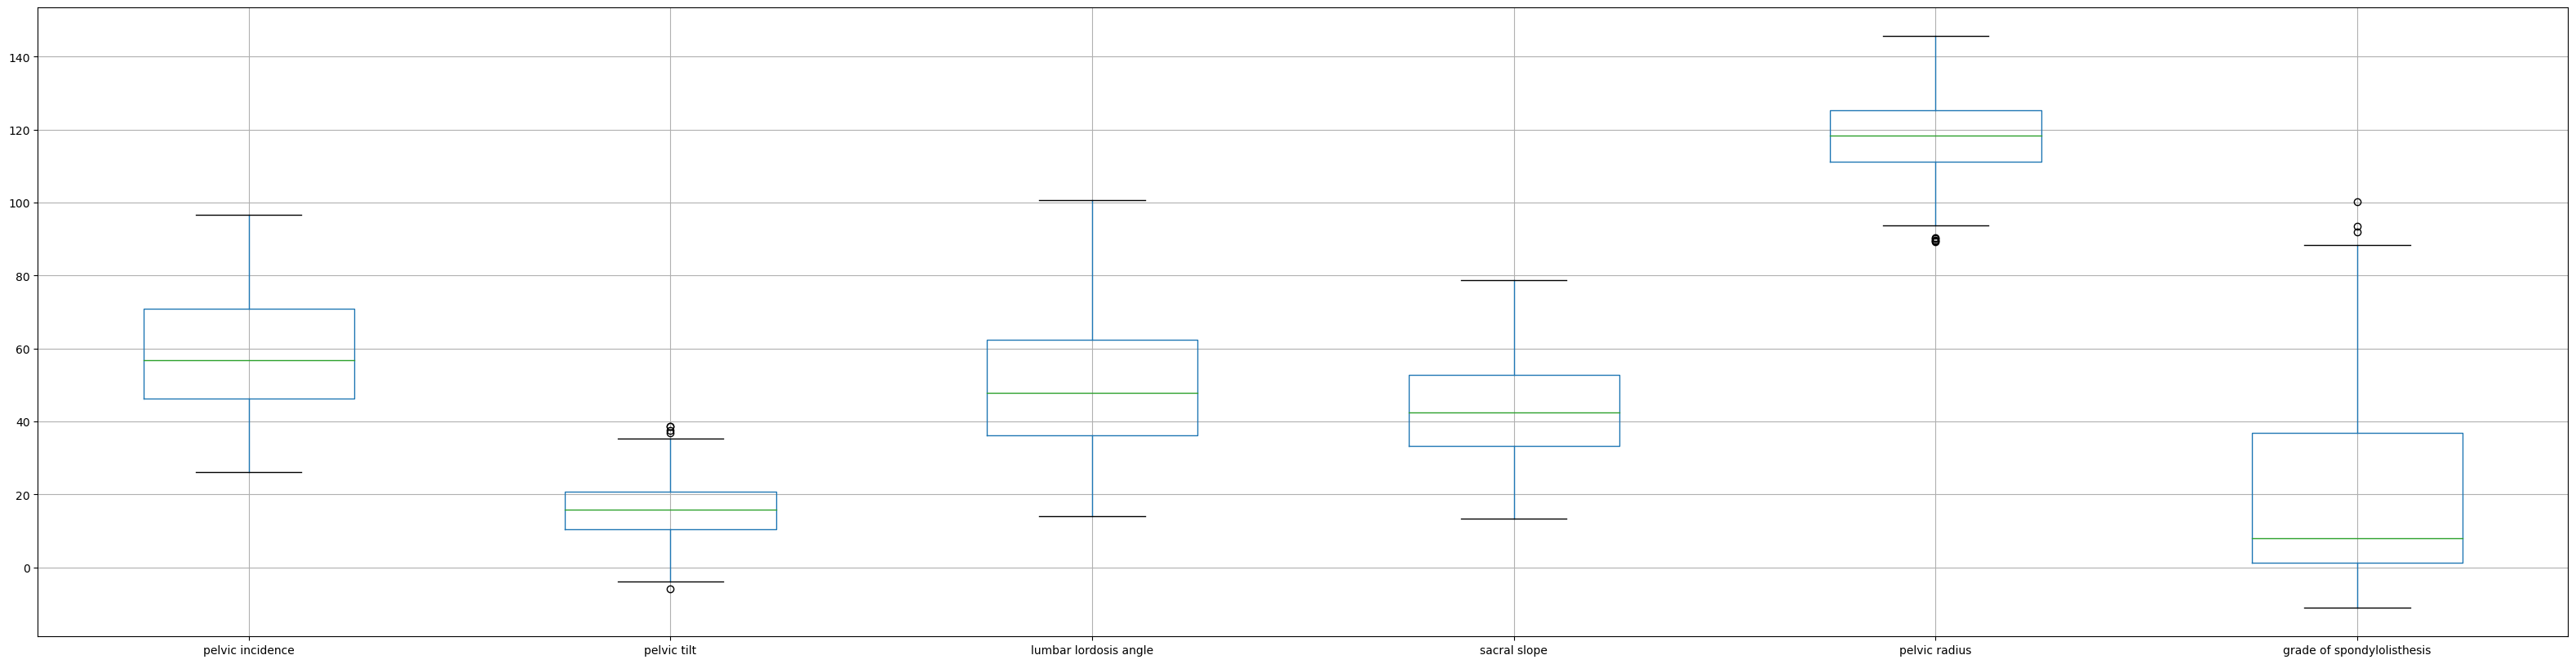

In [54]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster,cophenet
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import adjusted_rand_score
import pandas as pd
import numpy as np

# get dataset

df=pd.read_table("")#input dataset filepath here
df.columns =["pelvic incidence", "pelvic tilt", "lumbar lordosis angle", "sacral slope", "pelvic radius" , "grade of spondylolisthesis","Class"]

attributes = ["pelvic incidence", "pelvic tilt", "lumbar lordosis angle", "sacral slope", "pelvic radius" , "grade of spondylolisthesis"]







#get & remove outliers using IQR
figOutlier=plt.figure(figsize=(40,10))
outlierBP = df.boxplot(column=attributes)
figOutlier.savefig("Outlier Boxplot.png")
for y in attributes:
    for x in [y]:
        q75,q25 = np.percentile(df.loc[:,x],[75,25])
        intr_qr = q75-q25

        max = q75+(1.5*intr_qr)
        min = q25-(1.5*intr_qr)

        df.loc[df[x] < min,x] = np.nan
        df.loc[df[x] > max,x] = np.nan


df =df.dropna(axis=0)
refigOutlier=plt.figure(figsize=(40,10))
reoutlierBP = df.boxplot(column=attributes)
refigOutlier.savefig("Resultant Outlier Boxplot.png")

# get labels
class_Labels = df.iloc[:,6]
textClassLabels= df[['Class']].copy()

# change non-numerical labels to integers
from sklearn import preprocessing
le= preprocessing.LabelEncoder()
classLabels = le.fit_transform(class_Labels)


In [55]:
df


,pelvic incidence,pelvic tilt,lumbar lordosis angle,sacral slope,pelvic radius,grade of spondylolisthesis,Class
0,39.06,10.06,25.02,29.00,114.41,4.56,DH
1,68.83,22.22,50.09,46.61,105.99,-3.53,DH
2,69.30,24.65,44.31,44.64,101.87,11.21,DH
3,49.71,9.65,28.32,40.06,108.17,7.92,DH
4,40.25,13.92,25.12,26.33,130.33,2.23,DH
...,...,...,...,...,...,...,...
304,47.90,13.62,36.00,34.29,117.45,-4.25,NO
305,53.94,20.72,29.22,33.22,114.37,-0.42,NO
306,61.45,22.69,46.17,38.75,125.67,-2.71,NO
307,45.25,8.69,41.58,36.56,118.55,0.21,NO


In [56]:
textClassLabels

,Class
0,DH
1,DH
2,DH
3,DH
4,DH
...,...
304,NO
305,NO
306,NO
307,NO


In [57]:
classLabels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Complete Linkage

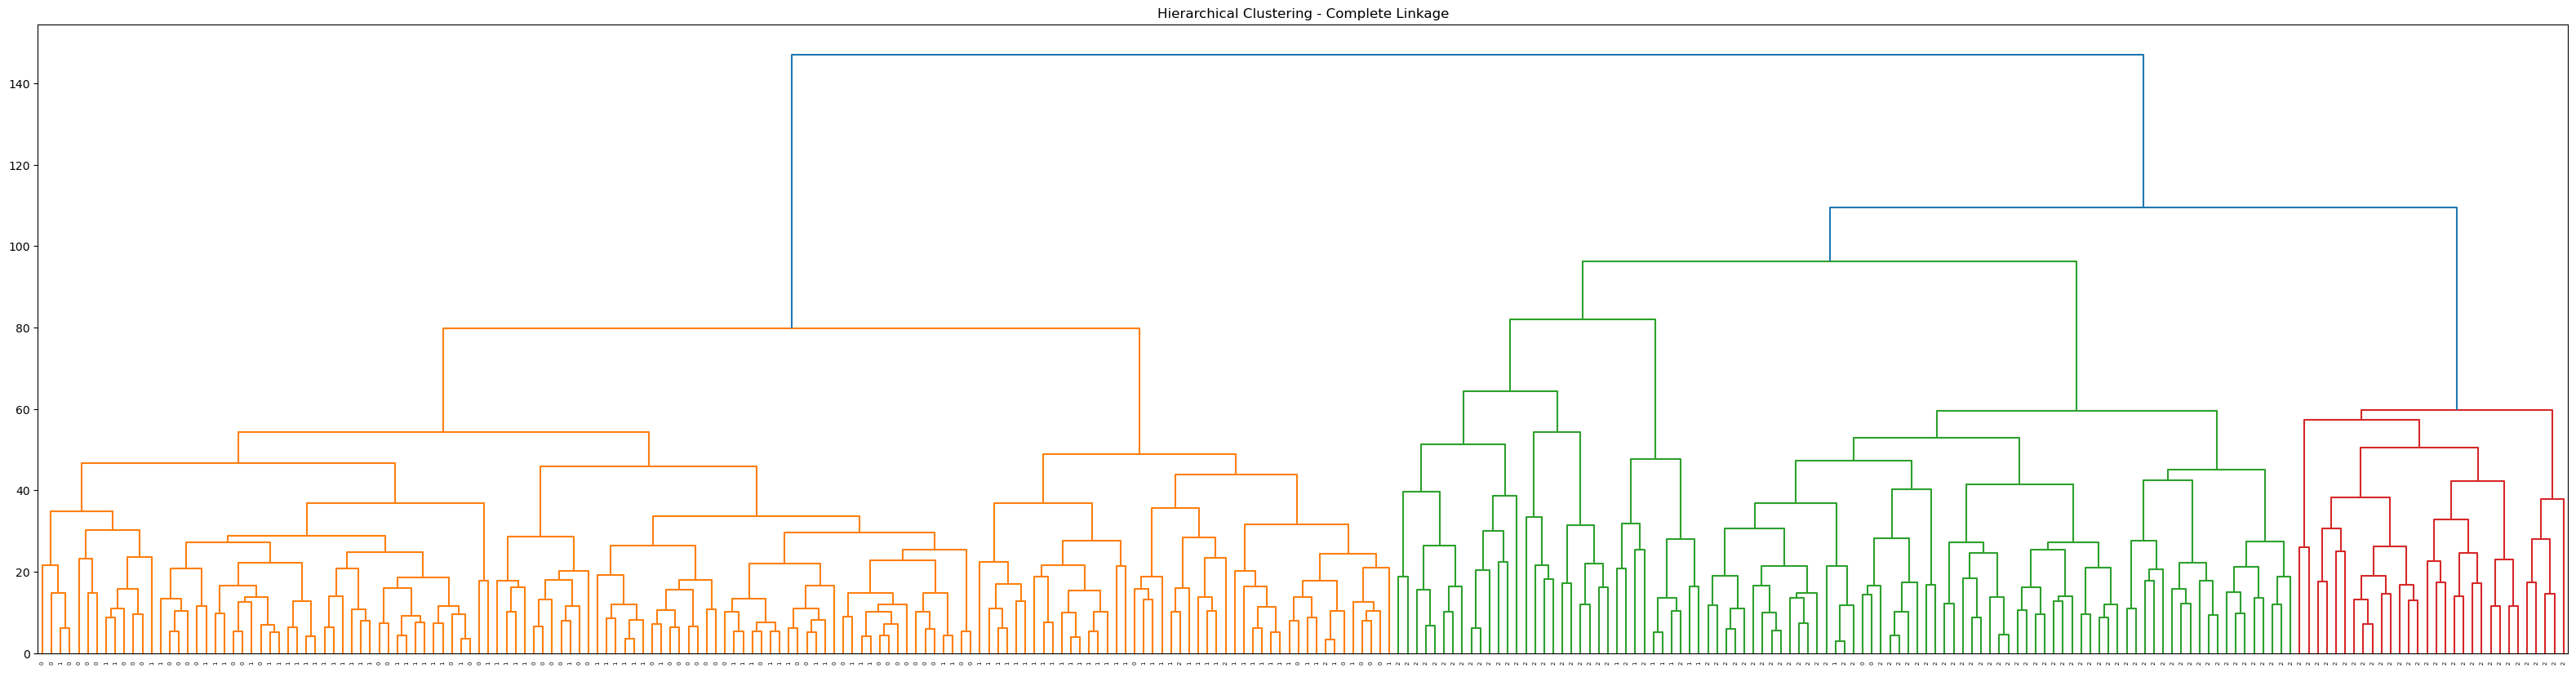

In [58]:

#perform clustering
complete = linkage(df.iloc[:,0:6],method='complete',optimal_ordering=True)

#visualize
plt.figure(figsize=(40,10))
plt.title("Hierarchical Clustering - Complete Linkage")

dendrogram(Z=complete,labels=classLabels)
plt.savefig('complete.png', bbox_inches='tight')

^
Complete
Single
v

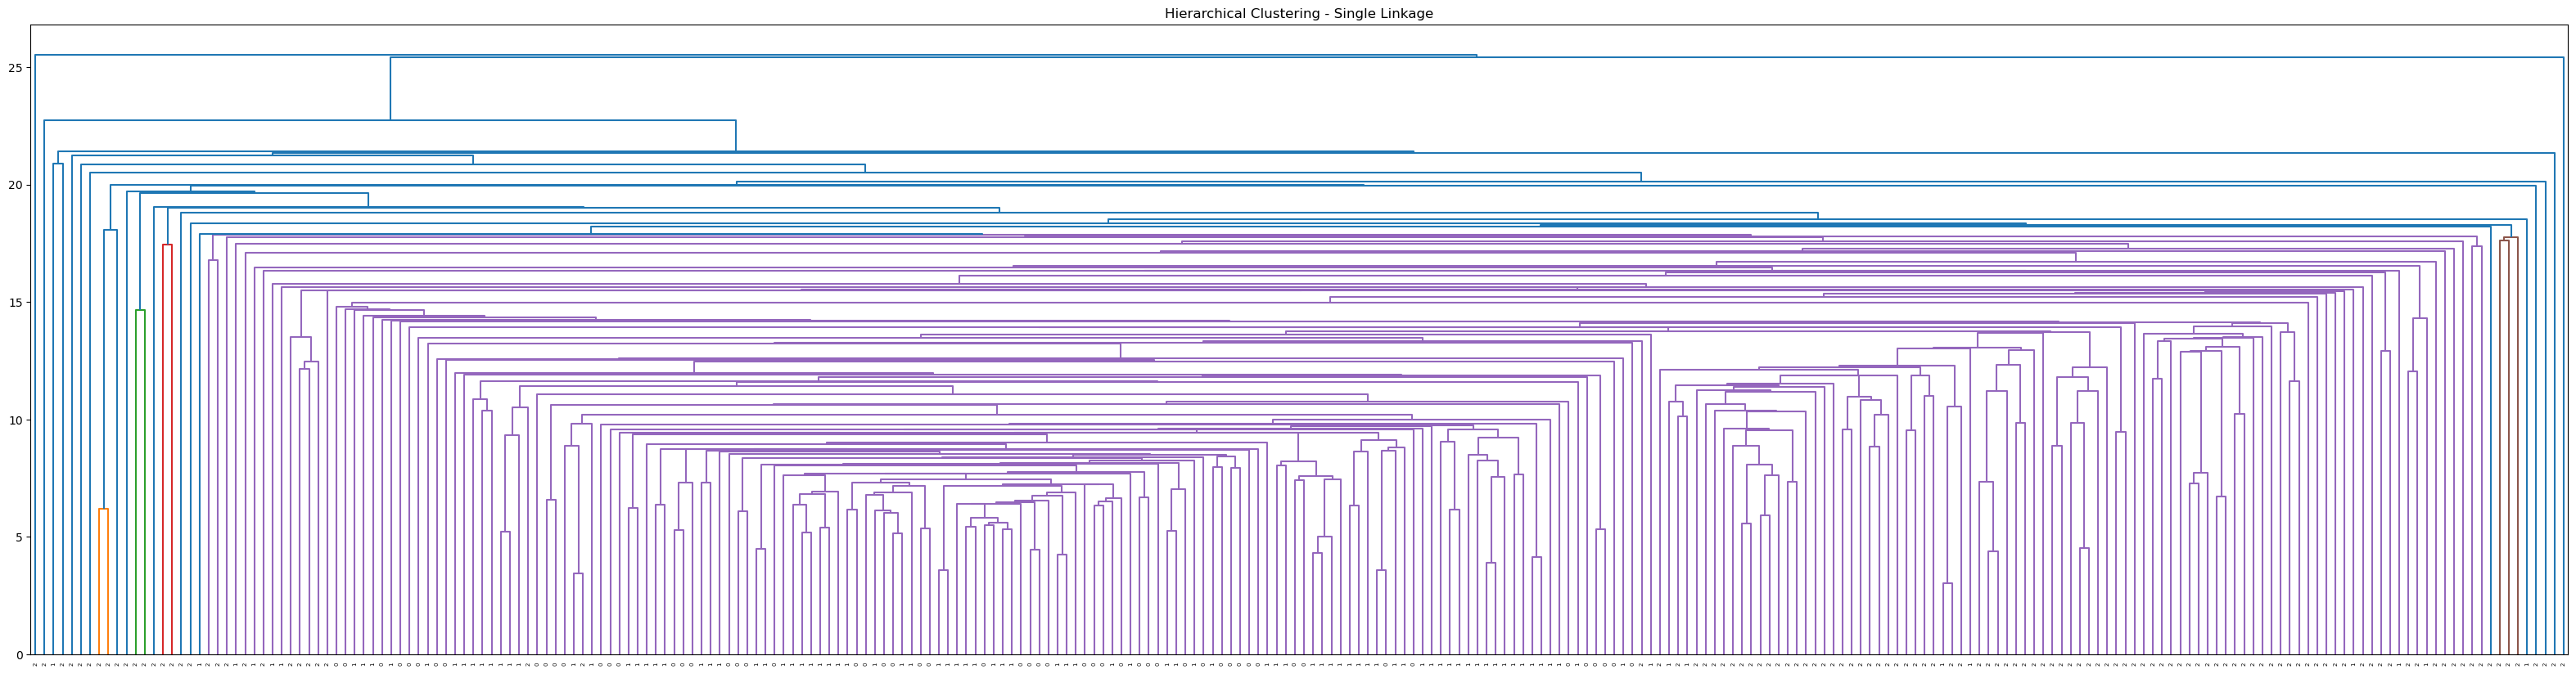

In [59]:
#perform clustering
single = linkage(df.iloc[:,0:6],method='single',optimal_ordering=True)

#visualize
plt.figure(figsize=(40,10))
plt.title("Hierarchical Clustering - Single Linkage")

dendrogram(Z=single,labels=classLabels,)
plt.savefig('single.png', bbox_inches='tight')


Geoup Average

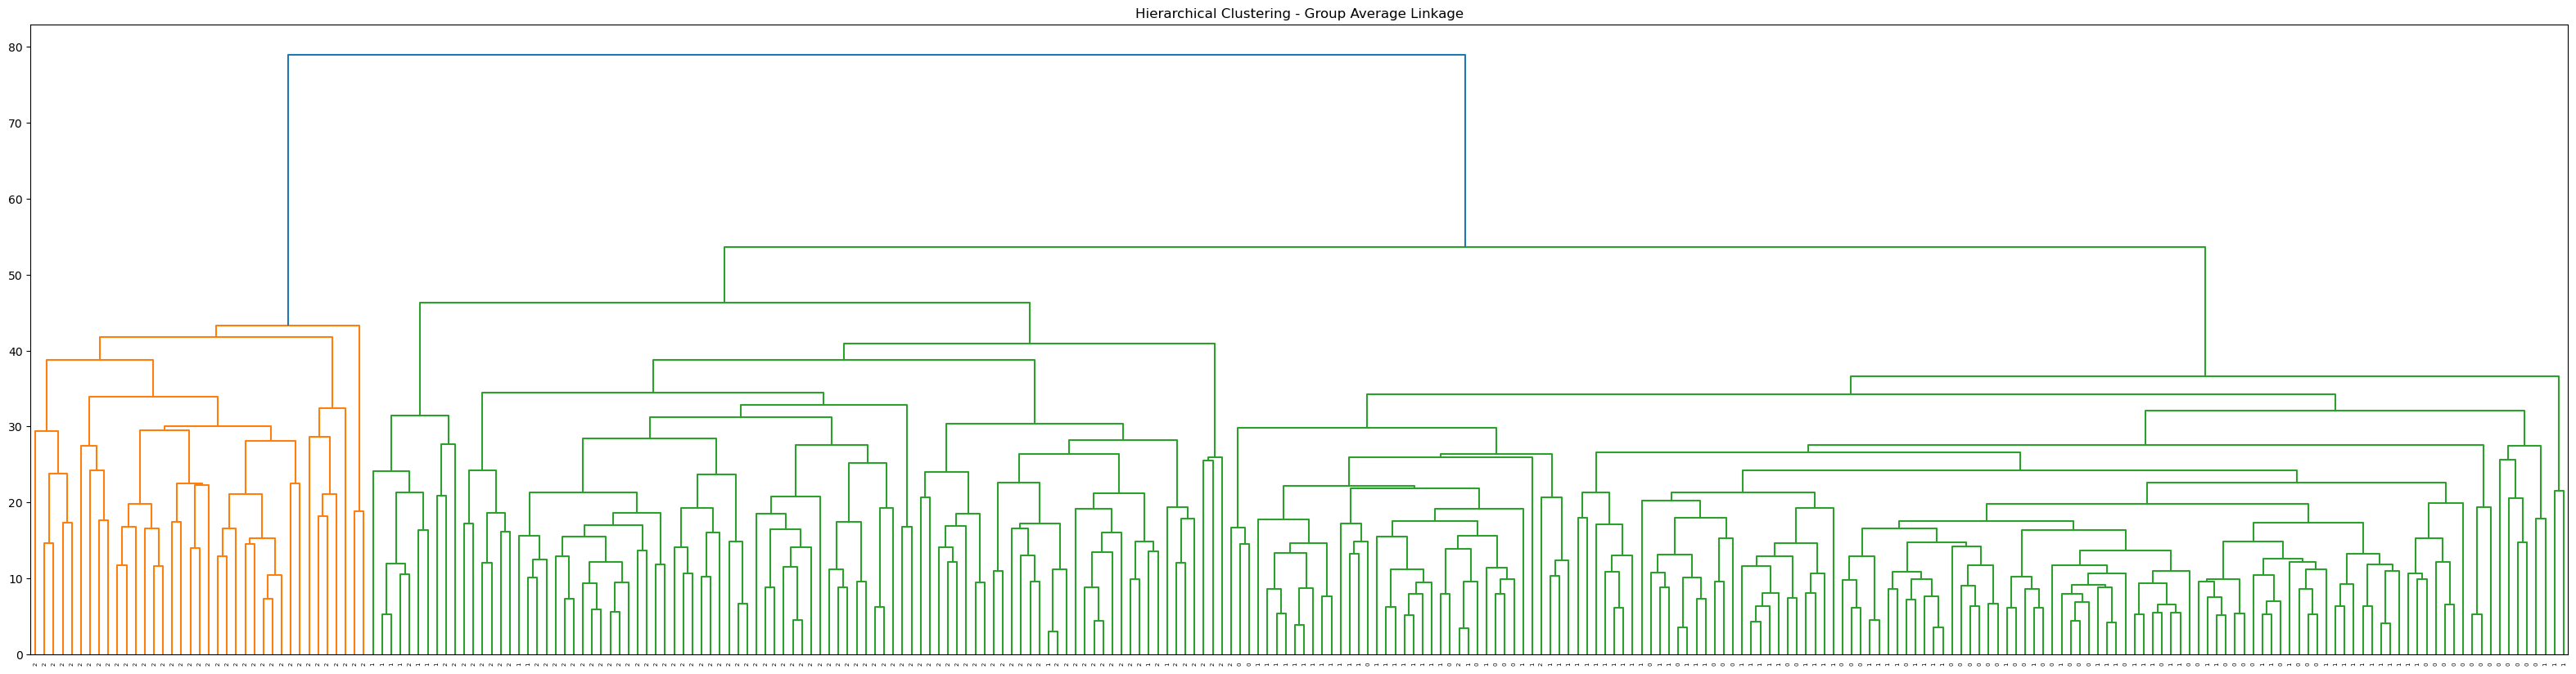

In [60]:
#perform clustering
GA = linkage(df.iloc[:,0:6],method='average',optimal_ordering=True)

#visualize
plt.figure(figsize=(40,10))
plt.title("Hierarchical Clustering - Group Average Linkage")

dendrogram(Z=GA,labels=classLabels,)
plt.savefig('GroupAverage.png', bbox_inches='tight')

In [84]:
singleclusters = fcluster(single, 3, criterion='maxclust')
singleclusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [85]:
completeclusters = fcluster(complete, 3, criterion='maxclust')
completeclusters

array([1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 2, 2, 2, 2, 2, 2, 2,
       2, 3, 2, 3, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 3,
       2, 2, 2, 2, 2, 3, 1, 2, 3, 2, 2, 2, 3, 2, 3, 2, 2, 1, 2, 2, 3, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 3, 3, 3, 3, 2, 2, 2, 2, 3, 2, 2, 2,
       2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 3, 3, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3,
       3, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [86]:
gaclusters = fcluster(GA, 3, criterion='maxclust')
gaclusters

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 2, 2, 2, 2, 1, 2, 2,
       2, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1,
       2, 2, 2, 2, 2, 1, 3, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 3, 2, 2, 1, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 3, 2, 2,
       2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1,
       1, 1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3,
       3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

In [88]:
km=KMeans(n_clusters=3)
km.fit(df.iloc[:,0:6])
klabels =km.labels_

array([ 9.5573218 , 14.15361438,  9.41795625, ...,  8.48935215,
        9.44282267,  9.44282267])

In [87]:
print("\nSingle,Complete=")
print(adjusted_rand_score(singleclusters,completeclusters))
print("\nSingle,Group Average=")
print(adjusted_rand_score(singleclusters,gaclusters))
print("\nGroup Average,Complete=")
print(adjusted_rand_score(gaclusters,completeclusters))


Single,Complete=
0.009705840010481774

Single,Group Average=
0.00861218868354308

Group Average,Complete=
0.8317272318371585


In [89]:
print("\nSingle,Kmeans=")
print(adjusted_rand_score(singleclusters,klabels))
print("\nComplete,Kmeans=")
print(adjusted_rand_score(completeclusters,klabels))
print("\nGroup Average,Kmeans=")
print(adjusted_rand_score(gaclusters,klabels))


Single,Kmeans=
0.012474832116977348

Complete,Kmeans=
0.7466426194289796

Group Average,Kmeans=
0.7717366740902526


In [104]:
df1



,lumbar lordosis angle,sacral slope,pelvic radius,grade of spondylolisthesis,Class
0,25.02,29.00,114.41,4.56,DH
1,50.09,46.61,105.99,-3.53,DH
2,44.31,44.64,101.87,11.21,DH
3,28.32,40.06,108.17,7.92,DH
4,25.12,26.33,130.33,2.23,DH
...,...,...,...,...,...
304,36.00,34.29,117.45,-4.25,NO
305,29.22,33.22,114.37,-0.42,NO
306,46.17,38.75,125.67,-2.71,NO
307,41.58,36.56,118.55,0.21,NO


In [96]:
df1 =df.drop('pelvic incidence',axis=1)
df1 = df1.drop('pelvic tilt',axis=1)
df2 =df.drop('lumbar lordosis angle',axis=1)
df2 = df2.drop('sacral slope',axis=1)
df3 =df.drop('pelvic radius',axis=1)
df3 = df3.drop('grade of spondylolisthesis',axis=1)
# get labels
class_Labels = df.iloc[:,6]
textClassLabels= df[['Class']].copy()

# change non-numerical labels to integers
from sklearn import preprocessing
le= preprocessing.LabelEncoder()
classLabels = le.fit_transform(class_Labels)

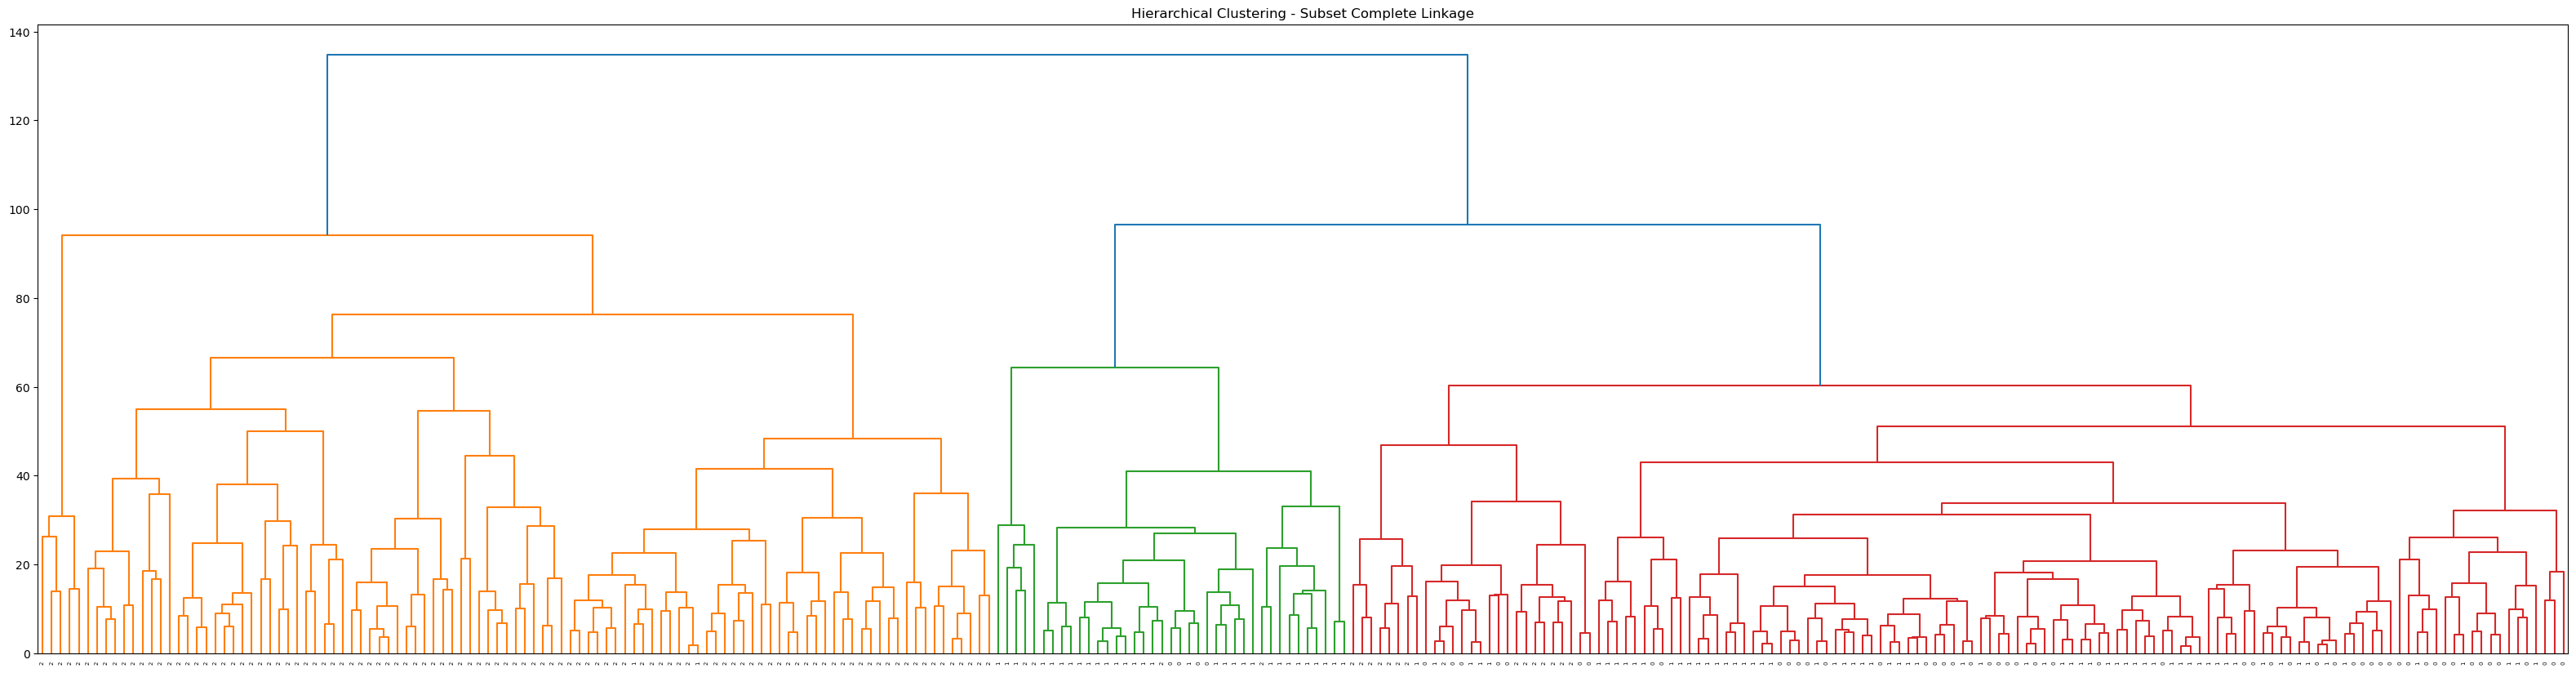

In [105]:
#perform clustering
complete1 = linkage(df1.iloc[:,0:4],method='complete',optimal_ordering=True)

#visualize
plt.figure(figsize=(40,10))
plt.title("Hierarchical Clustering - Subset Complete Linkage")

dendrogram(Z=complete1,labels=classLabels)
plt.savefig('complete1.png', bbox_inches='tight')

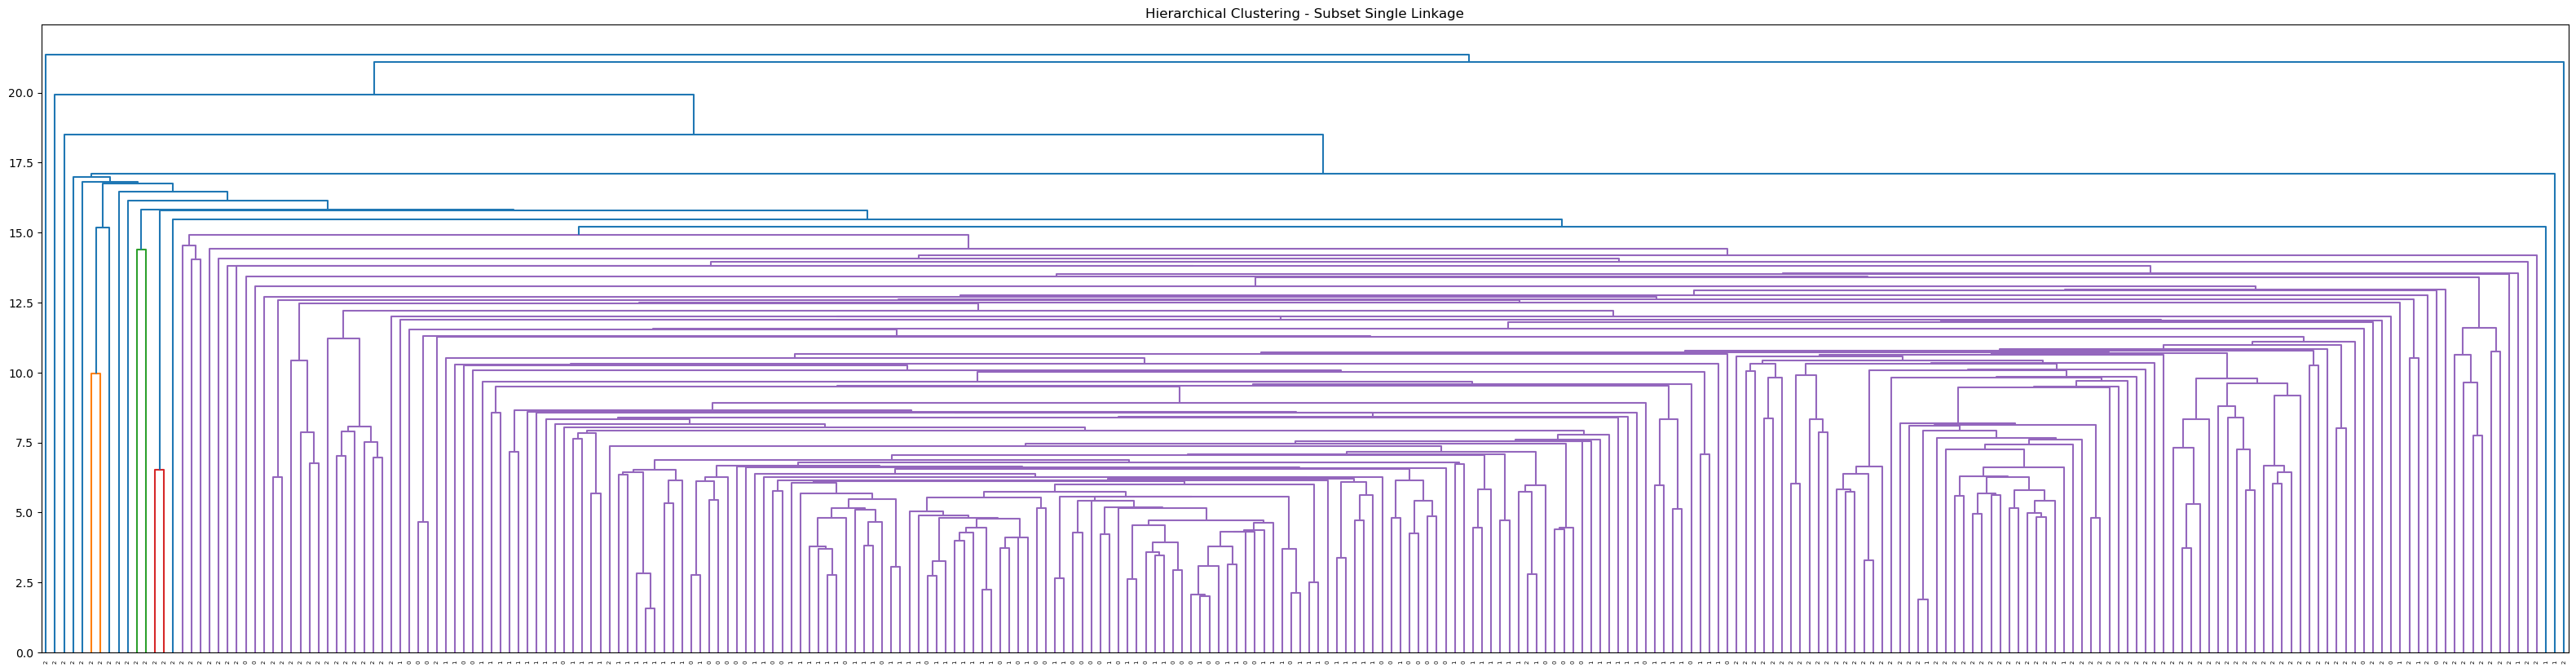

In [106]:
#perform clustering
single1 = linkage(df1.iloc[:,0:4],method='single',optimal_ordering=True)

#visualize
plt.figure(figsize=(40,10))
plt.title("Hierarchical Clustering - Subset Single Linkage")

dendrogram(Z=single1,labels=classLabels)
plt.savefig('single1.png', bbox_inches='tight')

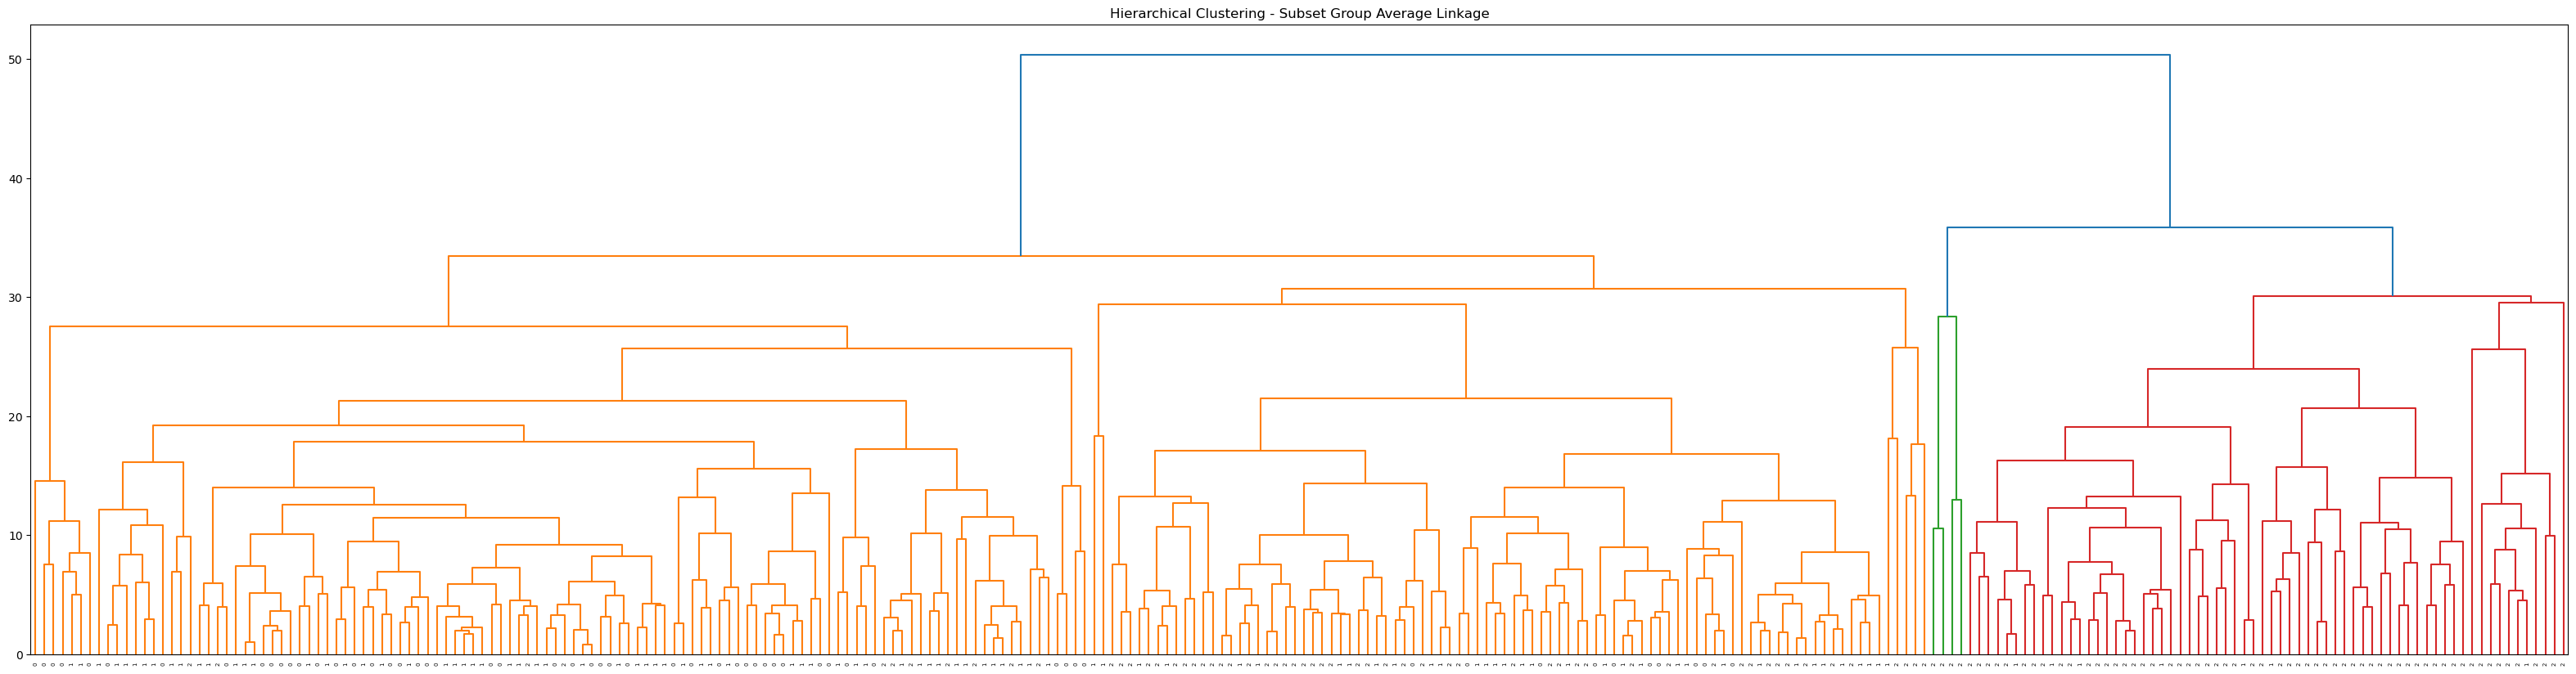

In [107]:
#perform clustering
ga1 = linkage(df.iloc[:,0:4],method='average',optimal_ordering=True)

#visualize
plt.figure(figsize=(40,10))
plt.title("Hierarchical Clustering - Subset Group Average Linkage")

dendrogram(Z=ga1,labels=classLabels)
plt.savefig('groupaverage1.png', bbox_inches='tight')

In [108]:
single1clusters = fcluster(single1, 3, criterion='maxclust')
complete1clusters = fcluster(complete1, 3, criterion='maxclust')
ga1lusters = fcluster(ga1, 3, criterion='maxclust')

print("\nSingle,new single=")
print(adjusted_rand_score(singleclusters,single1clusters))
print("\nComplete,new complete=")
print(adjusted_rand_score(completeclusters,complete1clusters))
print("\nGroup Average,new group average =")
print(adjusted_rand_score(gaclusters,ga1lusters))


Single,new single=
0.49546610058442747

Complete,new complete=
0.4442368426080095

Group Average,new group average =
0.37938354236828864
